In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## UCI Synthetic Dataset for Predictive Maintenance 
https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

In [30]:
path = "datasets/ai4i2020.csv"  
print("Path to dataset file:", path)

df = pd.read_csv(path)
df.head()

Path to dataset file: datasets/ai4i2020.csv


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


No missing values to worry about

In [31]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [32]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [33]:
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

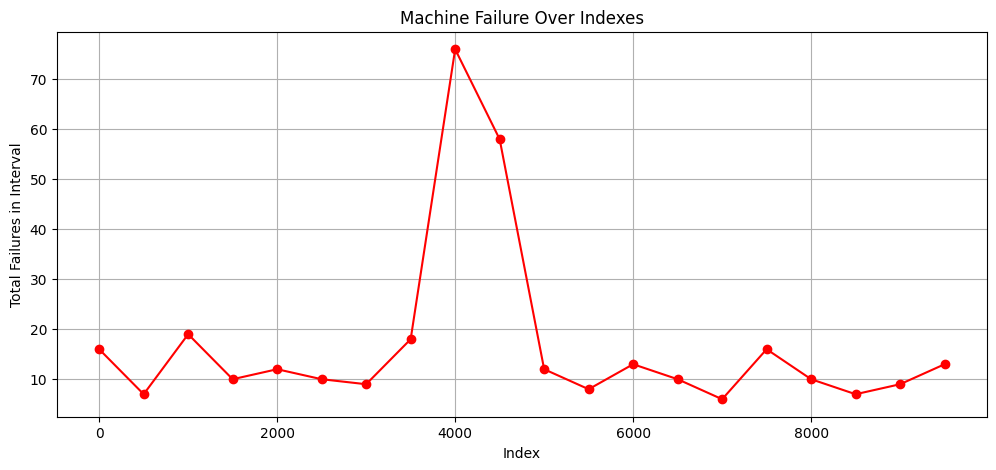

In [34]:
df["index"] = df.index 

interval = 500  
df_grouped = df.groupby(df["index"] // interval)["Machine failure"].sum()

plt.figure(figsize=(12, 5))  
plt.plot(df_grouped.index * interval, df_grouped, linestyle='-', marker='o', color='r') 
plt.xlabel("Index")
plt.ylabel("Total Failures in Interval")
plt.title("Machine Failure Over Indexes")
plt.grid(True)

plt.show()

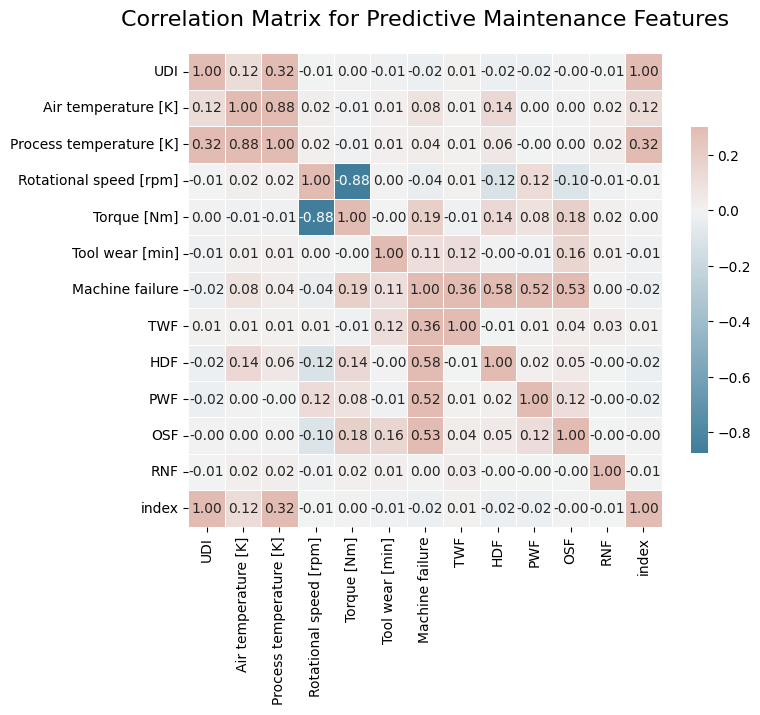

In [35]:
numeric_columns = df.select_dtypes(include=[np.number])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={"shrink": .5})

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Predictive Maintenance Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


Based on the correlation matrix for the UCI dataset, we can observe that certain features may be redundant due to their high correlation. For example, Process temperature [K] and Air temperature [K] show a strong positive correlation (0.88), indicating that one of them might be unnecessary for predictive modeling. Similarly, Torque [Nm] and Process temperature [K] have a strong negative correlation (-0.88), suggesting that torque decreases as process temperature increases. Removing highly correlated features can help prevent multicollinearity and improve model performance.

When selecting features for predictive maintenance, it is also useful to focus on those with moderate to high correlation with Machine failure. In this dataset, HDF (0.58), OSF (0.53), and PWF (0.52) have the strongest correlations with machine failure, indicating they may be important predictive factors. Conversely, features like Rotational speed [rpm] and Tool wear [min] show very weak correlations, meaning they might not significantly contribute to failure predictions and could be considered for removal before model training.

To further validate these correlations, we can calculate the p-value, which determines the statistical significance of each relationship. Using the formula t = r * sqrt((n-2)/(1-r²)), where r is the correlation coefficient and n = 124494 (sample size), we can test whether these correlations are statistically significant. Typically, a p-value < 0.05 indicates a significant relationship, while p < 0.01 or p < 0.001 suggest even stronger significance. This additional analysis can help confirm which features should be prioritized or removed for an optimized predictive maintenance model.

In [36]:
import scipy.stats as stats

n = len(df)  
r = 0.11  
t = r * math.sqrt((n-2)/(1-r**2))
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))
print(f"t-statistic: {t}, p-value: {p}")

t-statistic: 11.066053324825127, p-value: 0.0


# Preparing data for the ml

In [37]:
df['torque_speed_ratio'] = df['Torque [Nm]'] / (df['Rotational speed [rpm]'] + 1)  
df['temp_difference'] = df['Process temperature [K]'] - df['Air temperature [K]']  

Since failures are rare, it will be balanced the dataset using SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Machine failure', 'UDI', 'Product ID', 'Type'], axis=1)  # Keep only numerical features  
y = df['Machine failure']

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# Random Forest feature selection

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19044\1450103782.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


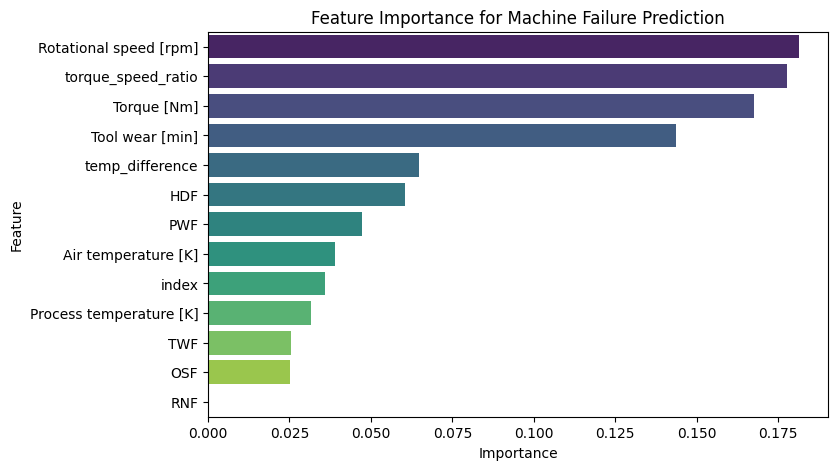

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)


importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_features = feature_importance.sort_values('Importance', ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Feature Importance for Machine Failure Prediction')
plt.show()

# ML

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
}

In [42]:
from sklearn.metrics import classification_report

# Clean feature names in X_train and X_test to ensure they are valid
X_train.columns = X_train.columns.str.replace(r'[\[\]<>,]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>,]', '', regex=True)

# Convert the column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    results[name] = classification_report(y_test, y_pred, output_dict=True)  

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19044\1274395916.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_results, x="Model", y="Score", hue="Metric", ci=None)


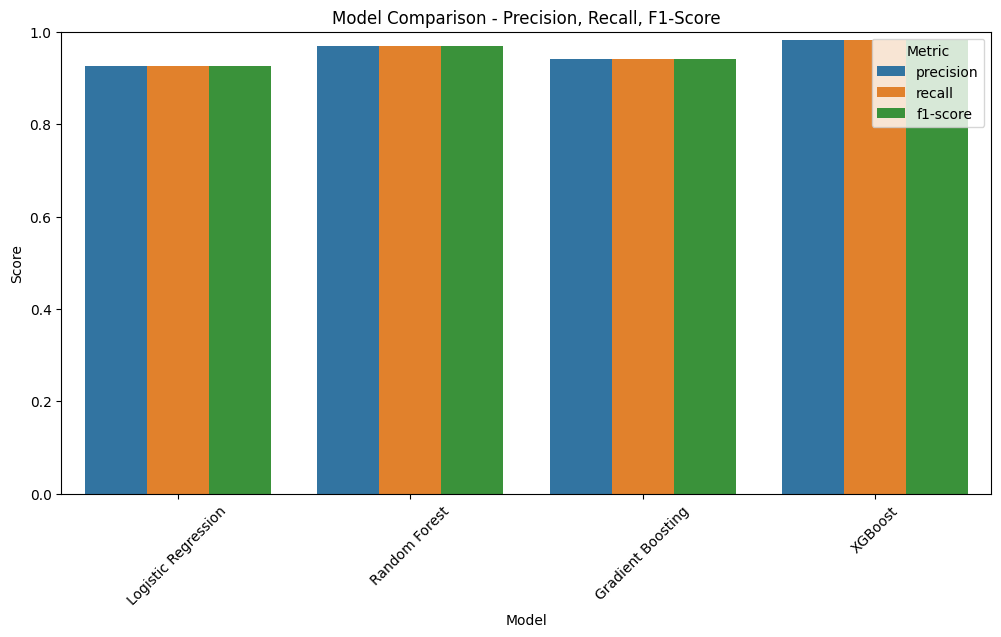

In [43]:
metrics = ['precision', 'recall', 'f1-score']
classes = list(results['Logistic Regression'].keys())[:-3]  # Ignore 'accuracy', 'macro avg', 'weighted avg'

data = []
for model_name, report in results.items():
    for cls in classes:
        for metric in metrics:
            data.append({
                'Model': model_name,
                'Class': cls,
                'Metric': metric,
                'Score': report[cls][metric]
            })

df_results = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x="Model", y="Score", hue="Metric", ci=None)
plt.title("Model Comparison - Precision, Recall, F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.show()
